In [12]:
from preseimei import darkflat
from preseimei import install_indexfiles
from preseimei import seimei_ana
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/alps/south/'
obs_date = '20220114'

gain_exp_for_obj = "x8_0.996464"
gain_exp_for_flat = "x8_0.996464"
## download index files for astrometry.net
files1, files2= darkflat.get_all_dark_flat_file(data_dir, obs_date, dark_name = "DARK", flat_name = "twilight")

In [14]:

print(len(files1), len(files2))

## dark & flat
out_dir_for_dark_flat = "/alps/south/dark_flat"
darkflat.main(data_dir, obs_date, out_dir_for_dark_flat,  gain_exp_for_obj, gain_exp_for_flat)
flat_med_arr = darkflat.get_image_med(files2)

15 36


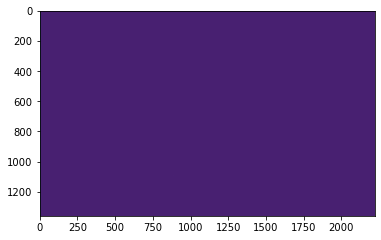

In [3]:

flat_dark = np.load("/alps/south/dark_flat/flat_dark_20220114.npz")
plt.imshow(flat_dark["g_dark_for_obj"])

In [6]:
flat_dark["g_dark_for_obj"]

array([[2.18450e+03, 8.52075e+03, 6.13125e+03, ..., 9.62000e+02,
        9.89500e+02, 9.78500e+02],
       [0.00000e+00, 1.75000e+00, 0.00000e+00, ..., 9.37500e+02,
        9.78500e+02, 9.28500e+02],
       [5.48000e+02, 3.75000e+00, 4.50000e+00, ..., 9.73500e+02,
        9.86000e+02, 9.79500e+02],
       ...,
       [0.00000e+00, 1.75000e+00, 0.00000e+00, ..., 9.16000e+02,
        9.48250e+02, 9.03250e+02],
       [5.48000e+02, 3.75000e+00, 4.50000e+00, ..., 9.46750e+02,
        9.61500e+02, 9.54000e+02],
       [3.27500e+01, 2.12500e+00, 1.04690e+04, ..., 9.79250e+02,
        9.90250e+02, 9.46000e+02]], dtype=float32)

In [10]:
flat_dark["r_dark_for_obj"]
#flat = flat_dark["z_flat"]
print(flat_dark["r_dark_for_obj"])


[[2.1845000e+03 8.5207500e+03 6.1272500e+03 ... 1.0405000e+03
  1.0340000e+03 1.0105000e+03]
 [0.0000000e+00 1.7500000e+00 0.0000000e+00 ... 9.4900000e+02
  1.0217500e+03 9.7200000e+02]
 [5.4800000e+02 3.7500000e+00 4.5000000e+00 ... 9.9575000e+02
  1.0300000e+03 9.5750000e+02]
 ...
 [0.0000000e+00 1.7500000e+00 0.0000000e+00 ... 9.0450000e+02
  9.9050000e+02 9.3325000e+02]
 [5.4800000e+02 3.7500000e+00 4.5000000e+00 ... 9.6550000e+02
  1.0000000e+03 9.2900000e+02]
 [3.2750000e+01 1.3750000e+00 1.0458125e+04 ... 9.2925000e+02
  9.7050000e+02 9.2700000e+02]]


In [18]:
for i in range(len(files1)):
    hdul = fits.open(files1[i])
    movie_now = hdul[0].data
    fits_header = hdul[0].header
    gain = hdul[0].header['GAINCNFG']
    exposure = str(hdul[0].header['EXPTIME1'])
    print(gain, exposure)
    hdul.close()

x8 0.996464
x8 0.996464
x8 0.996464
x8 0.996464
x8 0.996464
x8 0.996464
x16 0.091512
x8 0.996464
x8 0.996464
x8 0.996464
x8 0.996464
x8 0.996464
x16 0.091512
x8 0.996464
x16 0.091512


In [19]:
for i in range(len(files2)):
    hdul = fits.open(files2[i])
    movie_now = hdul[0].data
    fits_header = hdul[0].header
    obj_type = hdul[0].header['OBJECT']
    gain = hdul[0].header['GAINCNFG']
    exposure = str(hdul[0].header['EXPTIME1'])
    print(obj_type, gain, exposure)
    print(files2[i])
    hdul.close()

twilight x8 0.996464
/alps/south/20220114/TRCS00118292.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117630.fits
twilight x8 4.992488
/alps/south/20220114/TRCS00118301.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117672.fits
twilight x16 0.091512
/alps/south/20220114/TRCS00117692.fits
twilight x16 0.091512
/alps/south/20220114/TRCS00117690.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117680.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117632.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117642.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117631.fits
twilight x8 3.497792
/alps/south/20220114/TRCS00118321.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117670.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00118291.fits
twilight x8 4.992488
/alps/south/20220114/TRCS00118300.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00117681.fits
twilight x8 0.996464
/alps/south/20220114/TRCS00118290.fits
twilight x8 3.497792
/alps/south/20220

In [11]:
flat_med = darkflat.get_image_med(files2)


In [87]:
dark_for_flat_med_arr = darkflat.get_image_med(files1)

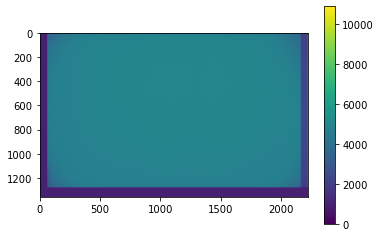

In [84]:
flat_med_ = np.median( flat_med, axis=0)

plt.imshow(flat_med_)
plt.colorbar()
plt.show()

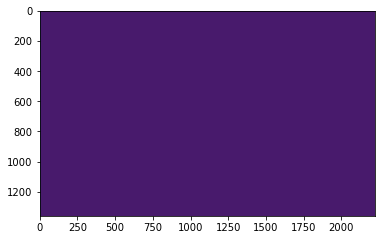

In [90]:
dark_med = np.median( dark_for_flat_med_arr, axis=0)


In [91]:
dark_med 

array([[2.18450e+03, 8.52075e+03, 6.12825e+03, ..., 1.04775e+03,
        1.04250e+03, 1.02000e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.36000e+02,
        9.76750e+02, 9.26500e+02],
       [5.48000e+02, 3.80000e+01, 4.50000e+00, ..., 9.70500e+02,
        9.85250e+02, 9.60250e+02],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.03250e+02,
        9.45500e+02, 9.00750e+02],
       [5.48000e+02, 3.80000e+01, 4.50000e+00, ..., 9.45000e+02,
        9.61000e+02, 9.27500e+02],
       [3.27500e+01, 2.87500e+00, 4.12250e+03, ..., 9.77000e+02,
        9.68000e+02, 9.25000e+02]], dtype=float32)